
## STEP 1 - Data Pre-Processing

Import Libraries

Read dataset

Add Cap and floor for Logisitc growth -> Cap must be less than floor not even equal to 

## Step 2 : Train test split 

## Step 3 : Basic Prophet Model and Trend Points 

Default prophet model

Plotting basic plot_components

Visualizing Change points

## Step 4 :  Specifying Change Points Manually

## Step 5 : Adding Logistic growth

Not so useful 


## Step 6 : Evaluating performance

In [ ]:
from prophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline

In [ ]:
dataset= pd.read_csv(r"C:\Users\Phanindra.Panthagani\OneDrive - Fractal Analytics Pvt. Ltd\1Verizon\H_and_M_stockdata.csv")
dataset.head()

# Add Cap to make it applicable to logisitic growth 
cap = dataset['High']
flr = dataset['Low']
dataset['cap'] = cap
dataset['floor'] = flr

dataset['cap'].fillna(10e-9)
dataset['floor'].fillna(0)
dataset.head()


In [ ]:
dataset.tail()

In [ ]:
dataset.info()

In [ ]:
dataset.describe(include='O')

In [ ]:

dataset.columns


## Step 2 : Train test split 

In [ ]:
X= dataset
y= dataset.iloc[:,4]
y # y is closing prices

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
X_train.head(2)

In [ ]:
train_dataset= pd.DataFrame()
train_dataset['ds'] = pd.to_datetime(X_train["Date"])
train_dataset['y']=y_train
train_dataset['cap'] = X_train['cap']
train_dataset['floor'] = X_train['floor']

train_dataset.tail(2)

## Step 3 : ARIMA

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0       268.600006
1       274.000000
2       275.000000
3       272.500000
4       266.799988
           ...    
1252    213.600006
1253    211.399994
1254    209.699997
1255    212.250000
1256    211.850006
Name: High, Length: 1257, dtype: float64

### Prophet will also let us take a look at the magnitudes of these possible changepoints

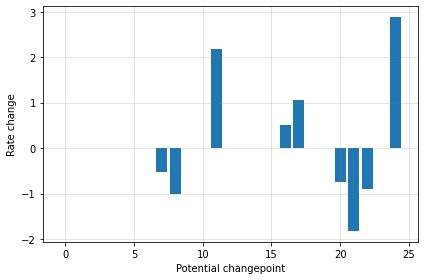

In [19]:
deltas = prophet_basic.params['delta'].mean(0)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas)
ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax.set_ylabel('Rate change')
ax.set_xlabel('Potential changepoint')
fig.tight_layout()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


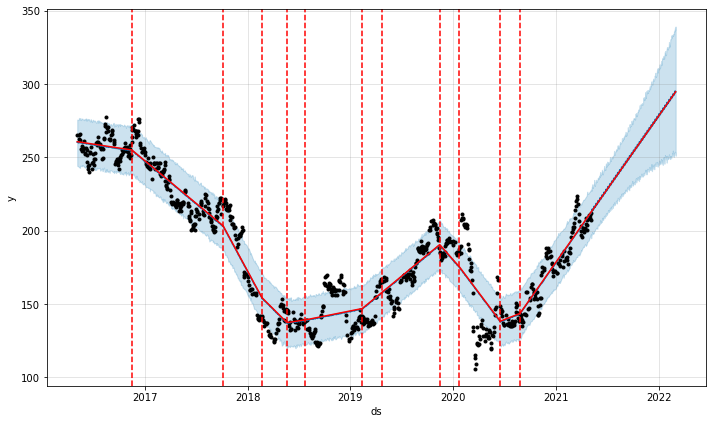

In [20]:
pro_change= Prophet(changepoint_range=0.95, yearly_seasonality=False)
fitted_train = pro_change.fit(train_dataset)
forecast = fitted_train.predict(future)
fig= pro_change.plot(forecast)
b = add_changepoints_to_plot(fig.gca(), pro_change, forecast)


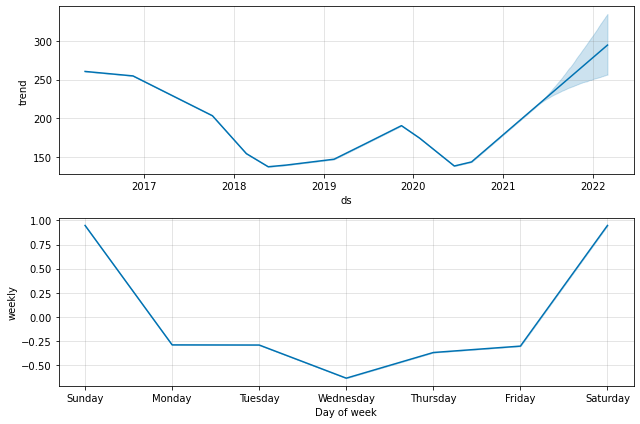

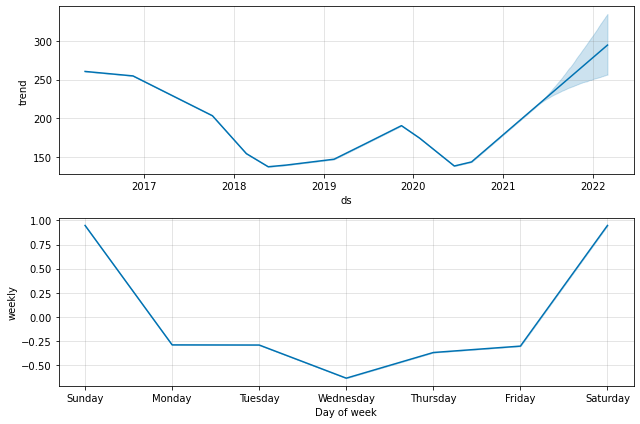

In [21]:
pro_change.plot_components(forecast)

## Step 4 :  Specifying Change Points Manually

In [22]:
train_dataset['ds'].describe()

<ipython-input-22-49bd4bfc127a>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                     879
unique                    879
top       2016-11-14 00:00:00
freq                        1
first     2016-05-06 00:00:00
last      2021-05-05 00:00:00
Name: ds, dtype: object

In [23]:
train_dataset.head()

,ds,y,cap,floor
929,2020-01-16,184.860001,186.360001,183.479996
901,2019-11-29,184.839996,186.619995,182.880005
579,2018-08-16,127.040001,127.139999,125.959999
367,2017-10-13,221.199997,223.000000,220.199997
615,2018-10-05,168.979996,171.500000,168.000000


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


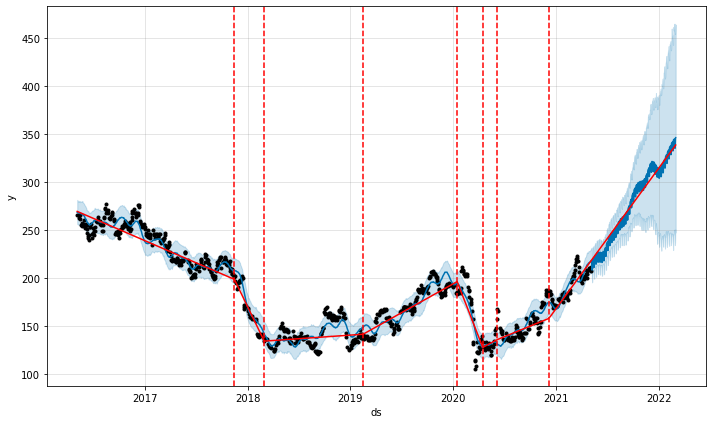

In [24]:
pro1 = Prophet(growth = 'linear',
               changepoints=['2017-11-15',
                             '2018-03-01','2019-02-15','2020-01-15', '2020-04-15','2020-06-03','2020-12-06'],
               changepoint_prior_scale = 0.6)

fitted_manual = pro1.fit(train_dataset)
forecast_manual = fitted_manual.predict(future)
fig=pro1.plot(forecast_manual)
a = add_changepoints_to_plot(fig.gca(), pro1, forecast_manual)

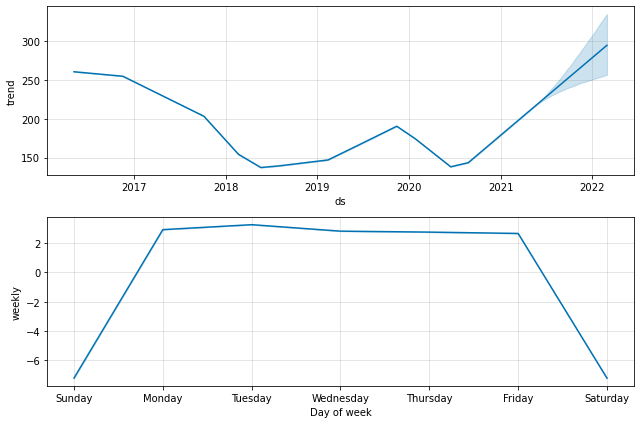

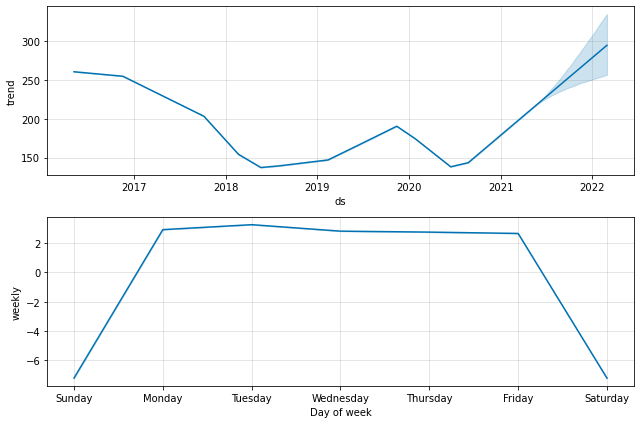

In [25]:
fitted_manual.plot_components(forecast)

## Step 5 : Adding Logistic growth

In [26]:
train_dataset['caplessthanfloor'] = train_dataset['cap'] <= train_dataset['floor'] 
train_dataset.head()
train_dataset['caplessthanfloor'].value_counts()

# Cap must be greater than floor not even equal to 

False    875
True       4
Name: caplessthanfloor, dtype: int64

In [27]:
# We need to add a small value so that cap is greater than floor 
#For logistic to fit 
cp_lessthan_Fl_mask = (train_dataset['caplessthanfloor'] == True)
train_dataset.loc[cp_lessthan_Fl_mask,'cap'] = train_dataset.loc[cp_lessthan_Fl_mask,'cap'] + 10e-9

#Recheck to see Cap is always greater than floor 
train_dataset['caplessthanfloor'] = train_dataset['cap'] <= train_dataset['floor'] 
train_dataset.head()
train_dataset['caplessthanfloor'].value_counts()


False    879
Name: caplessthanfloor, dtype: int64

In [28]:
help(Prophet)

Help on class Prophet in module prophet.forecaster:

class Prophet(builtins.object)
 |  Prophet(growth='linear', changepoints=None, n_changepoints=25, changepoint_range=0.8, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_mode='additive', seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, uncertainty_samples=1000, stan_backend=None)
 |  
 |  Prophet forecaster.
 |  
 |  Parameters
 |  ----------
 |  growth: String 'linear' or 'logistic' to specify a linear or logistic
 |      trend.
 |  changepoints: List of dates at which to include potential changepoints. If
 |      not specified, potential changepoints are selected automatically.
 |  n_changepoints: Number of potential changepoints to include. Not used
 |      if input `changepoints` is supplied. If `changepoints` is not supplied,
 |      then n_changepoints potential changepoints are selected uniformly 

The logistic growth model can also handle a saturating minimum, which is specified with a column floor in the same way as the cap column specifies the maximum

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


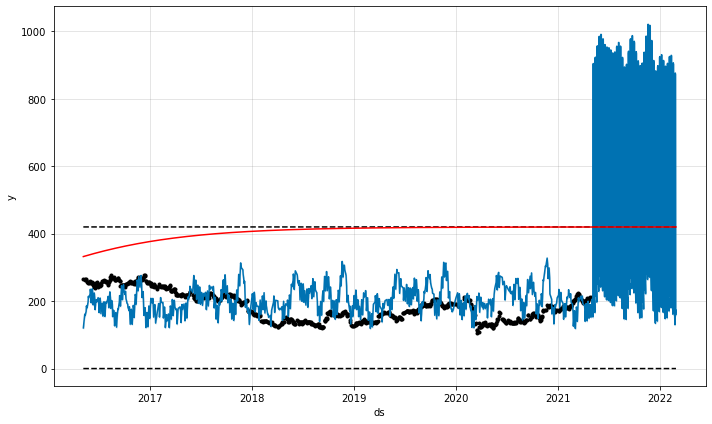

In [29]:
pro_logistic = Prophet(growth = 'logistic',  n_changepoints= 60, seasonality_mode='multiplicative',
                      changepoint_prior_scale=0.05)


future['cap'] = max(train_dataset['cap'])*1.5
future['floor'] = 0

fitted_forecast = pro_logistic.fit(train_dataset).predict(future)
fig1 = pro_logistic.plot(fitted_forecast)
c = add_changepoints_to_plot(fig1.gca(), pro_logistic, fitted_forecast)

## Step 6 : Evaluating performance

X_test, y_test were in train _test split . We will use these to evaluate performance

https://scikit-learn.org/stable/modules/model_evaluation.html

# Kaggle example notebooks


In [42]:
def EvaluatePerformance_fbprophet(model,test,y_true):
    
    
    
    
    #Make sure you use the command below to install latest version of scikit learn
    # conda install -c conda-forge scikit-learn  
    
    from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error
    test_dataset = pd.DataFrame()
    test_dataset['ds'] = pd.to_datetime(test["Date"])
    predicted_df = model.predict(test_dataset) #Get the predicted data frame on test
    y_pred = predicted_df['yhat'] #yhat is the output column name in fbprophet
    print("y_pred is \n",y_pred)
    
    
    RMSE = mean_squared_error(y_true, y_pred,squared= False)
    print("The RMSE of the model with the test data is",RMSE)
    
    MAPE =  mean_absolute_percentage_error(y_true, y_pred)
    print("The MAPE of the model with the test data is",MAPE)
    
    return_dict = { "Root mean squared error" : RMSE,
                     "mean_absolute_percentage_error" : MAPE}
    
    
    return return_dict
    

In [43]:
EvaluatePerformance_fbprophet(fitted_manual,X_test,y_test)

y_pred is 
 0      268.073924
1      268.246537
2      267.301312
3      267.196476
4      266.930000
          ...    
373    209.237817
374    214.147470
375    216.331232
376    216.130425
377    217.280917
Name: yhat, Length: 378, dtype: float64
The RMSE of the model with the test data is 56.27272447770563
The MAPE of the model with the test data is 0.2545097704786558


{'Root mean squared error': 56.27272447770563,
 'mean_absolute_percentage_error': 0.2545097704786558}